In [2]:
import pandas as pd
import sqlite3
from matplotlib import pyplot as plt

## آمار توصیفی سوال دوم

In [ ]:
# champion team season 2022-23

conn = sqlite3.connect('db/main.db')

champ2022_23 = pd.read_sql('''
                 SELECT c.season, c.champion, p.id, p.name, p.career_length, p.height
                 FROM champions c 
                 JOIN roster_data rd on c.Champion = rd.team_name 
                 JOIN players p on rd.player_id = p.id
                 WHERE c.season = "2022-23" AND rd.season = "2022-23" AND p.is_active=True ;
                 ''', conn)
# champ2022_23

In [3]:
# champion team season 2023-24

conn = sqlite3.connect('db/main.db')

champ2023_24 = pd.read_sql('''
                 SELECT c.season, c.champion, p.id, p.name, p.career_length, p.height
                 FROM champions c 
                 JOIN roster_data rd on c.Champion = rd.team_name 
                 JOIN players p on rd.player_id = p.id
                 WHERE c.season = "2023-24" AND rd.season = "2023-24" AND p.is_active=True;
                 ''', conn)
# champ2023_24

In [16]:
# champion team season 2022-23 & 2023-24

champ2022_24 = pd.concat([champ2022_23, champ2023_24], ignore_index=True)
# champ2022_24

In [ ]:
# top 15 players for season 2022-23

conn = sqlite3.connect('db/main.db')

top15_2022_23 = pd.read_sql('''
                           SELECT pe.player_id, p.name, pe.season, pe.rank, pe.points, p.career_length, p.height 
                           FROM player_evaluations pe 
                           JOIN players p on pe.player_id = p.id 
                           WHERE season = "2022-2023" and rank <= 15;
                           ''', conn)
# top15_2022_23

In [6]:
# top 15 players for season 2023-24

conn = sqlite3.connect('db/main.db')

top15_2023_24 = pd.read_sql('''
                           SELECT pe.player_id, p.name, pe.season, pe.rank, pe.points, p.career_length, p.height 
                           FROM player_evaluations pe 
                           JOIN players p on pe.player_id = p.id 
                           WHERE season = "2023-2024" and rank <= 15;
                           ''', conn)
# top15_2023_24

In [18]:
# top 15 players for season 2022-23 & 2023-24

top15_2022_24 = pd.concat([top15_2022_23, top15_2023_24], ignore_index=True)
# top15_2022_24

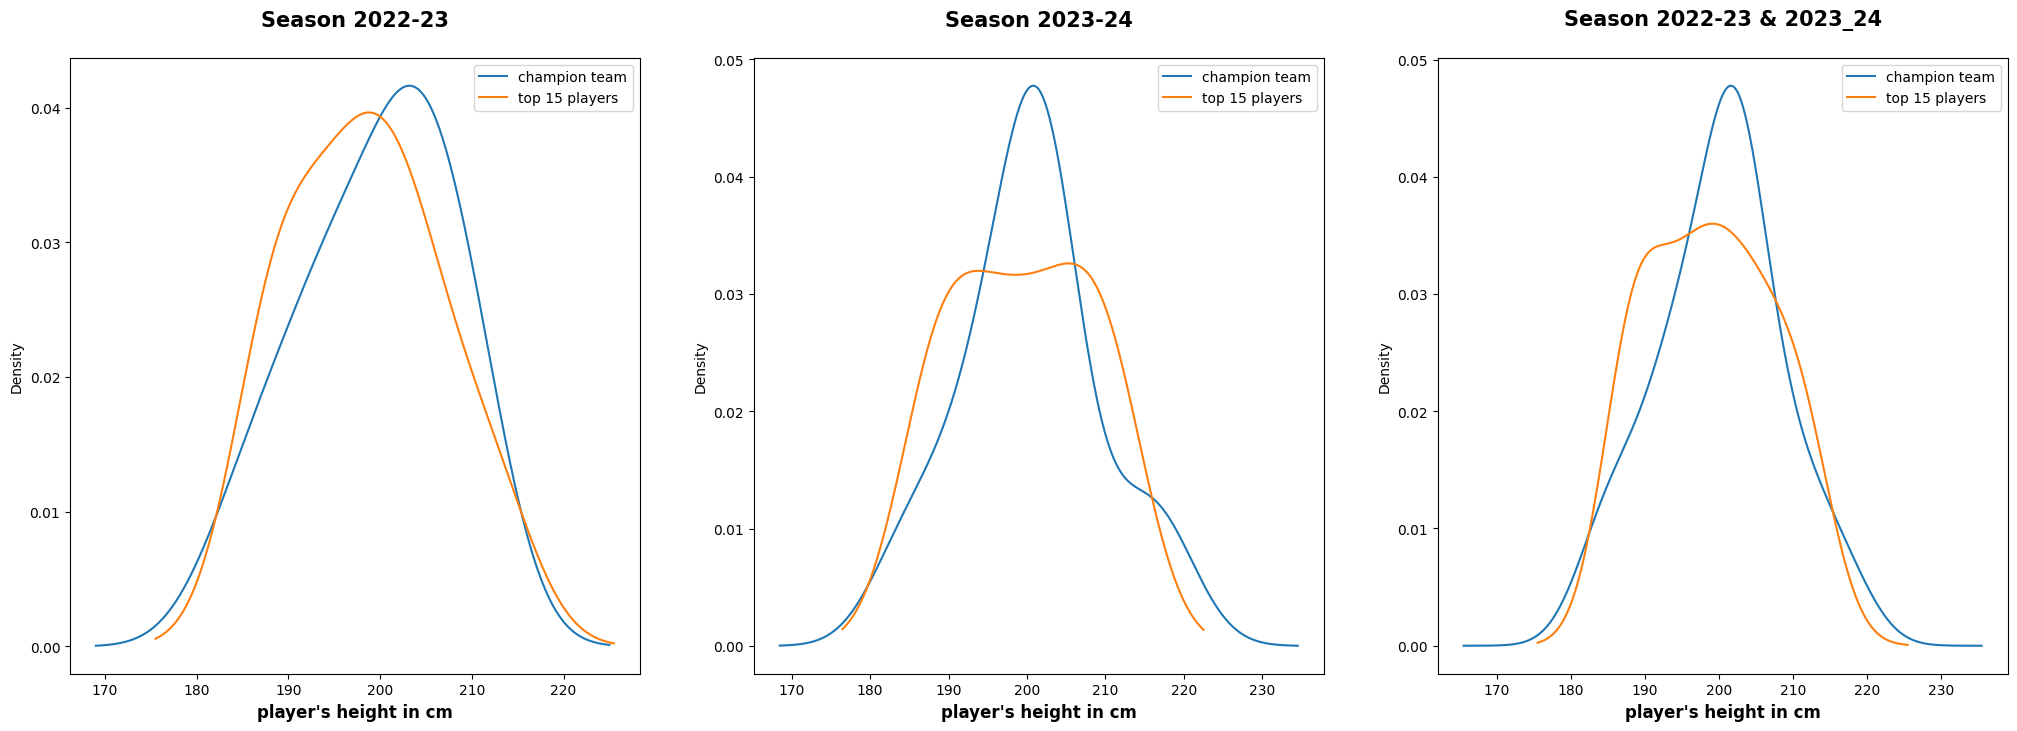

In [ ]:
fig, axes = plt.subplots(1, 3, figsize = (25,8))

champ2022_23['height'].plot(kind='kde', ax=axes[0], label='champion team')
top15_2022_23['height'].plot(kind='kde',ax=axes[0], label='top 15 players')

champ2023_24['height'].plot(kind='kde', ax=axes[1], label='champion team')
top15_2023_24['height'].plot(kind='kde',ax=axes[1], label='top 15 players')

champ2022_24['height'].plot(kind='kde', ax=axes[2], label='champion team')
top15_2022_24['height'].plot(kind='kde',ax=axes[2], label='top 15 players')



axes[0].set_title('Season 2022-23\n', fontweight='bold', fontsize=15)
axes[0].set_xlabel('player\'s height in cm', fontweight='bold', fontsize= 12)

axes[1].set_title('Season 2023-24\n', fontweight='bold', fontsize=15)
axes[1].set_xlabel('player\'s height in cm', fontweight='bold', fontsize= 12)
axes[2].set_title('Season 2022-23 & 2023_24\n', fontweight='bold', fontsize=15)
axes[2].set_xlabel('player\'s height in cm', fontweight='bold', fontsize= 12)

for ax in axes:
    ax.legend()

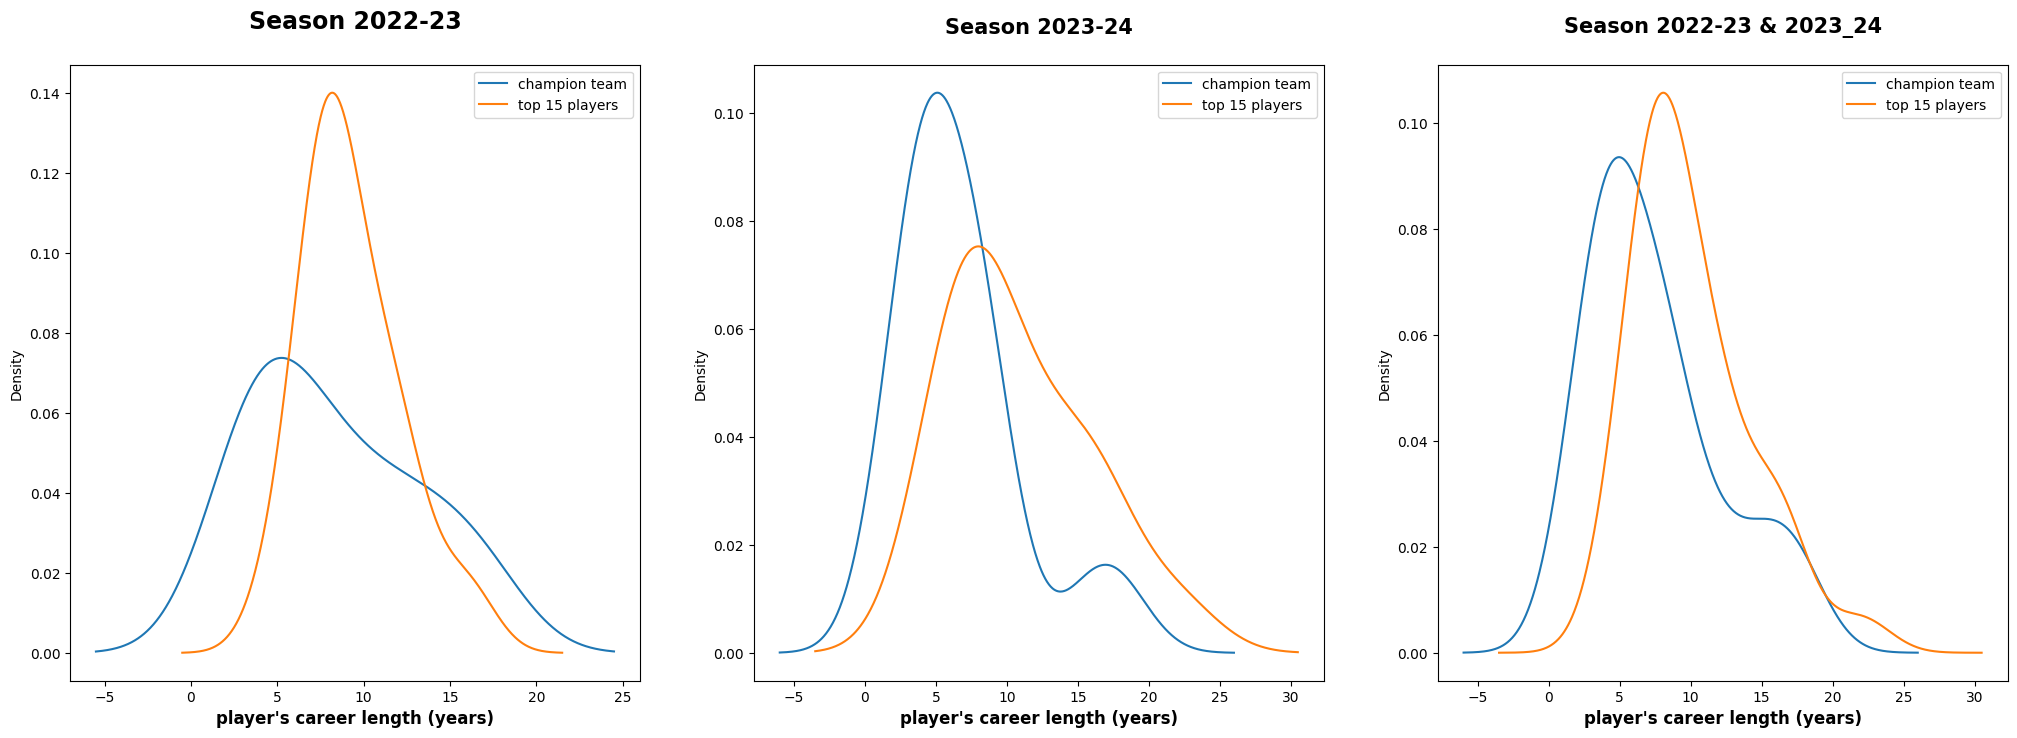

In [15]:
fig, axes = plt.subplots(1, 3, figsize = (25,8))

champ2022_23['career_length'].plot(kind='kde', ax=axes[0], label='champion team')
top15_2022_23['career_length'].plot(kind='kde',ax=axes[0], label='top 15 players')

champ2023_24['career_length'].plot(kind='kde', ax=axes[1], label='champion team')
top15_2023_24['career_length'].plot(kind='kde',ax=axes[1], label='top 15 players')

champ2022_24['career_length'].plot(kind='kde', ax=axes[2], label='champion team')
top15_2022_24['career_length'].plot(kind='kde',ax=axes[2], label='top 15 players')



axes[0].set_title('Season 2022-23\n', fontweight='bold', fontsize=17)
axes[0].set_xlabel('player\'s career length (years)', fontweight='bold', fontsize= 12)
axes[1].set_title('Season 2023-24\n', fontweight='bold', fontsize=15)
axes[1].set_xlabel('player\'s career length (years)', fontweight='bold', fontsize= 12)
axes[2].set_title('Season 2022-23 & 2023_24\n', fontweight='bold', fontsize=15)
axes[2].set_xlabel('player\'s career length (years)', fontweight='bold', fontsize= 12)

for ax in axes:
    ax.legend()

## آزمون فرض سوال اول

In [20]:
conn = sqlite3.connect('db/main.db')

top20_2022_24 = pd.read_sql('''
                 SELECT pe.season, p.id, p.name, p.weight, p.height, pe.rank
                 FROM player_evaluations pe
                 JOIN players p on pe.player_id = p.id
                 WHERE (season = "2023-2024" OR season = "2022-2023") AND rank <=20;
                 ''', conn)

top20_2022_24['height_to_weight'] = top20_2022_24['height'] / top20_2022_24['weight']
# top20_2022_24

In [22]:
conn = sqlite3.connect('db/main.db')

top20_2020_22 = pd.read_sql('''
                 SELECT pe.season, p.id, p.name, p.weight, p.height, pe.rank
                 FROM player_evaluations pe
                 JOIN players p on pe.player_id = p.id
                 WHERE (season = "2020-2021" OR season = "2021-2022") AND rank <=20;
                 ''', conn)

top20_2020_22['height_to_weight'] = top20_2020_22['height'] / top20_2020_22['weight']
# top20_2020_22